# Derivación de la ecuación de Schrödinger no lineal (NLS) separando parte real e imaginaria


La ecuación 5 es:

$$
i h_t + \frac{1}{2} h_{xx} + |h|^2 h = 0,
$$

donde $ h = h(t, x) $ es una función compleja. Escribimos $ h $ en términos de sus partes real e imaginaria:

$$
h(t, x) = u(t, x) + i v(t, x),
$$

donde $ u $ y $ v $ son funciones reales. Entonces:

$$ h_t = u_t + i v_t $$
$$ h_{xx} = u_{xx} + i v_{xx} $$
$$ |h|^2 = u^2 + v^2 $$
$$ |h|^2 h = (u^2 + v^2)(u + i v) = (u^2 + v^2)u + i (u^2 + v^2)v $$

Sustituyendo en la NLS:

$$
i (u_t + i v_t) + \frac{1}{2} (u_{xx} + i v_{xx}) + \left[ (u^2 + v^2)u + i (u^2 + v^2)v \right] = 0.
$$

Expandimos el primer término:

$$
i u_t + i^2 v_t = i u_t - v_t.
$$

Entonces la ecuación completa se convierte en:

$$
(i u_t - v_t) + \frac{1}{2} u_{xx} + \frac{i}{2} v_{xx} + (u^2 + v^2)u + i (u^2 + v^2)v = 0.
$$

Agrupamos los términos reales e imaginarios:

**Términos reales:** $$ -v_t + \frac{1}{2} u_{xx} + (u^2 + v^2)u $$

**Términos imaginarios:** $$ i u_t + \frac{i}{2} v_{xx} + i (u^2 + v^2)v $$

Por lo tanto, la ecuación se puede escribir como:

$$
\left[ -v_t + \frac{1}{2} u_{xx} + (u^2 + v^2)u \right] + i \left[ u_t + \frac{1}{2} v_{xx} + (u^2 + v^2)v \right] = 0.
$$

Para que este número complejo sea cero, tanto la parte real como la imaginaria deben ser cero. Así, obtenemos dos ecuaciones reales acopladas:

 **Parte real:**
   $$
   -v_t + \frac{1}{2} u_{xx} + (u^2 + v^2)u = 0 \quad \Rightarrow \quad v_t = \frac{1}{2} u_{xx} + (u^2 + v^2)u.
   $$

 **Parte imaginaria:**
   $$
   u_t + \frac{1}{2} v_{xx} + (u^2 + v^2)v = 0 \quad \Rightarrow \quad u_t = -\frac{1}{2} v_{xx} - (u^2 + v^2)v.
   $$

Por lo tanto:

$$
\begin{cases}
u_t = -\frac{1}{2} v_{xx} - (u^2 + v^2)v, \\
v_t = \frac{1}{2} u_{xx} + (u^2 + v^2)u.
\end{cases}
$$


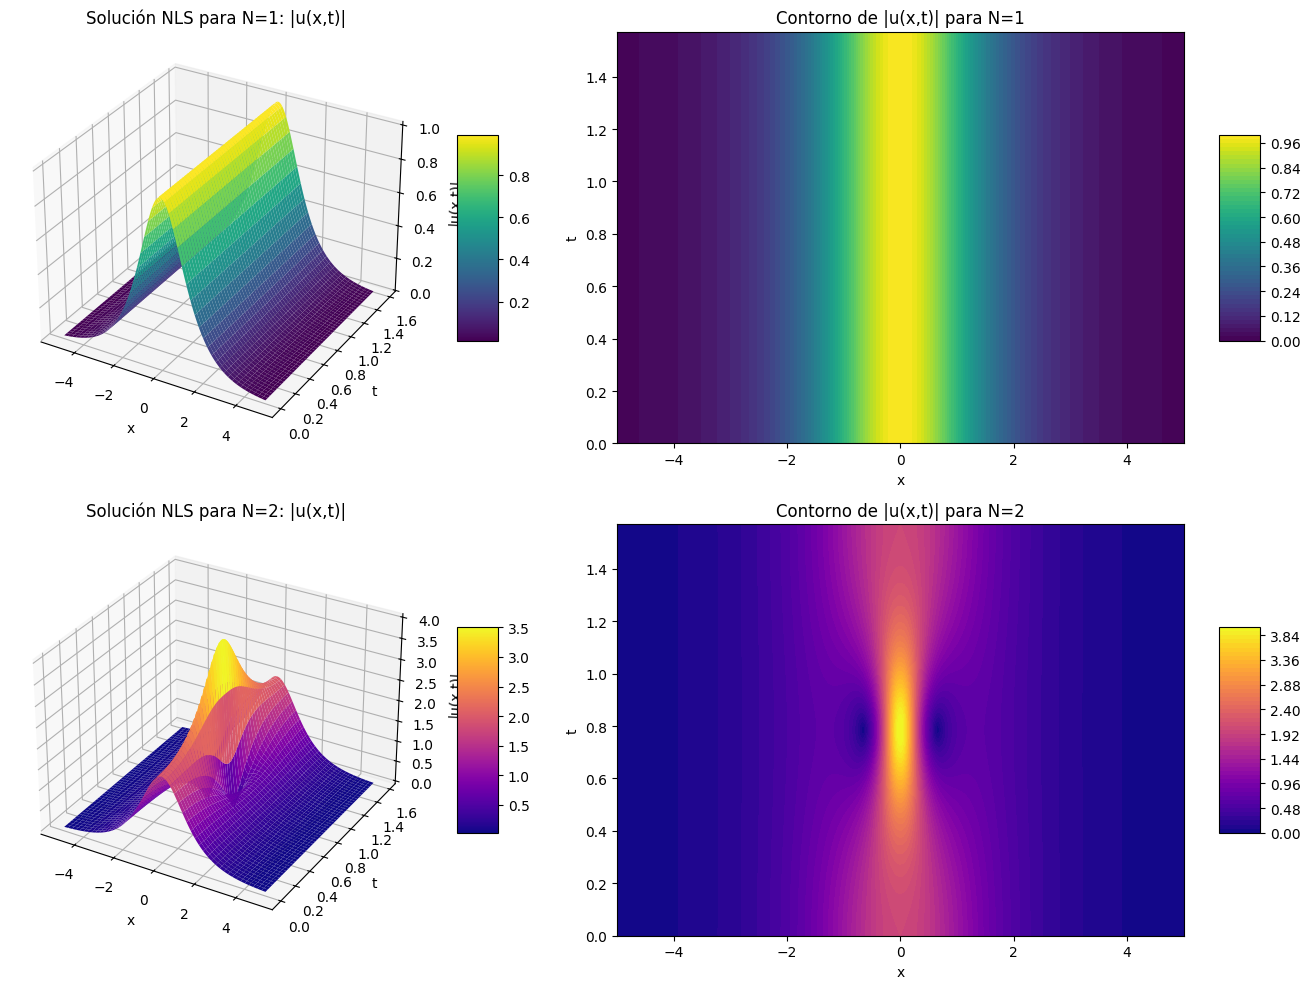

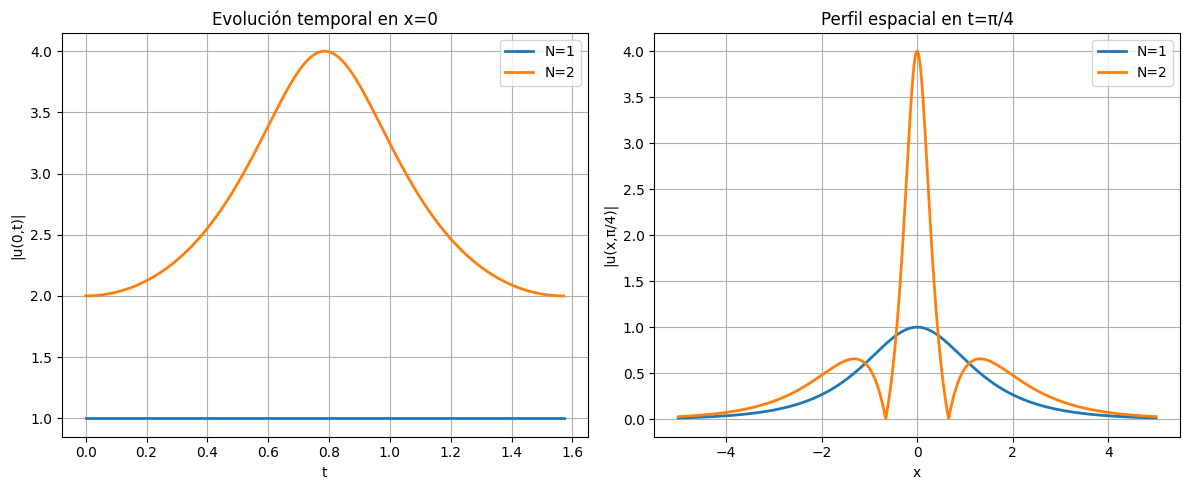

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(-5, 5, 1000)
t = np.linspace(0, np.pi/2, 1000)
X, T = np.meshgrid(x, t)


def q1(x, t):
    """
    Solución para N=1: h(x,t) = exp(-i t) sech(x)
    """
    return np.exp(-1j * t / 2) * (1 / np.cosh(x))


def q2(x, t):
    """
    Solución para N=2: h(x,t) = 4 exp(-i t) [cosh(3x) - exp(-i t) cosh(x)] / [cosh(3x) + exp(-i t) cosh(x)]
    """
    numerator = np.cosh(3*x) + 3*np.exp(-4j*t)*np.cosh(x)
    denominator = np.cosh(4*x) + 4*np.cosh(2*x) + 3*np.cos(4*t)
    return 4 * np.exp(-1j * t / 2) * numerator / denominator



Q1 = q1(X, T)
Q2 = q2(X, T)


abs_Q1 = np.abs(Q1)
abs_Q2 = np.abs(Q2)


fig = plt.figure(figsize=(15, 10))


ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, T, abs_Q1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax1.set_title('Solución NLS para N=1: |u(x,t)|')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('|u(x,t)|')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

ax2 = fig.add_subplot(2, 2, 2)
contour1 = ax2.contourf(X, T, abs_Q1, 50, cmap=cm.viridis)
ax2.set_title('Contorno de |u(x,t)| para N=1')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
fig.colorbar(contour1, ax=ax2, shrink=0.5, aspect=5)


ax3 = fig.add_subplot(2, 2, 3, projection='3d')
surf2 = ax3.plot_surface(X, T, abs_Q2, cmap=cm.plasma, linewidth=0, antialiased=True)
ax3.set_title('Solución NLS para N=2: |u(x,t)|')
ax3.set_xlabel('x')
ax3.set_ylabel('t')
ax3.set_zlabel('|u(x,t)|')
fig.colorbar(surf2, ax=ax3, shrink=0.5, aspect=5)


ax4 = fig.add_subplot(2, 2, 4)
contour2 = ax4.contourf(X, T, abs_Q2, 50, cmap=cm.plasma)
ax4.set_title('Contorno de |u(x,t)| para N=2')
ax4.set_xlabel('x')
ax4.set_ylabel('t')
fig.colorbar(contour2, ax=ax4, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 5))


ax5.plot(t, abs_Q1[:, 500], label='N=1', linewidth=2)
ax5.plot(t, abs_Q2[:, 500], label='N=2', linewidth=2)
ax5.set_title('Evolución temporal en x=0')
ax5.set_xlabel('t')
ax5.set_ylabel('|u(0,t)|')
ax5.legend()
ax5.grid(True)

# Para t=π/4 (mitad del tiempo)
mid_t_index = 500
ax6.plot(x, abs_Q1[mid_t_index, :], label='N=1', linewidth=2)
ax6.plot(x, abs_Q2[mid_t_index, :], label='N=2', linewidth=2)
ax6.set_title('Perfil espacial en t=π/4')
ax6.set_xlabel('x')
ax6.set_ylabel('|u(x,π/4)|')
ax6.legend()
ax6.grid(True)

plt.tight_layout()
plt.show()

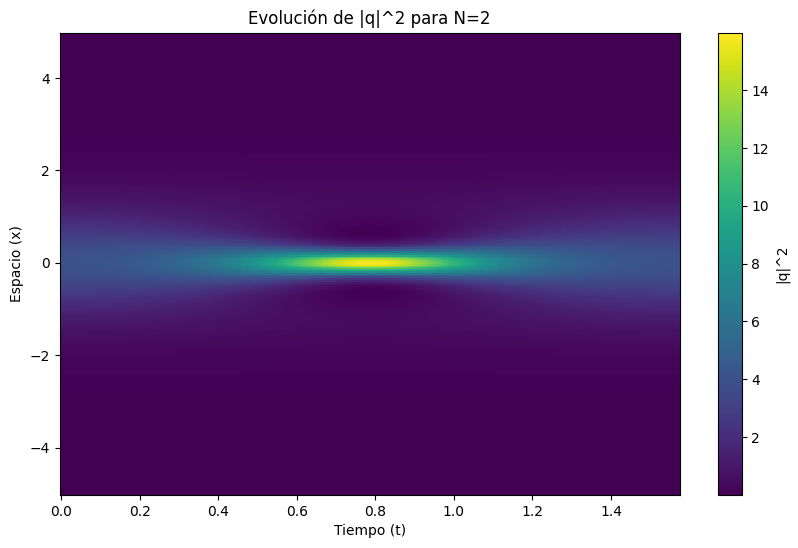

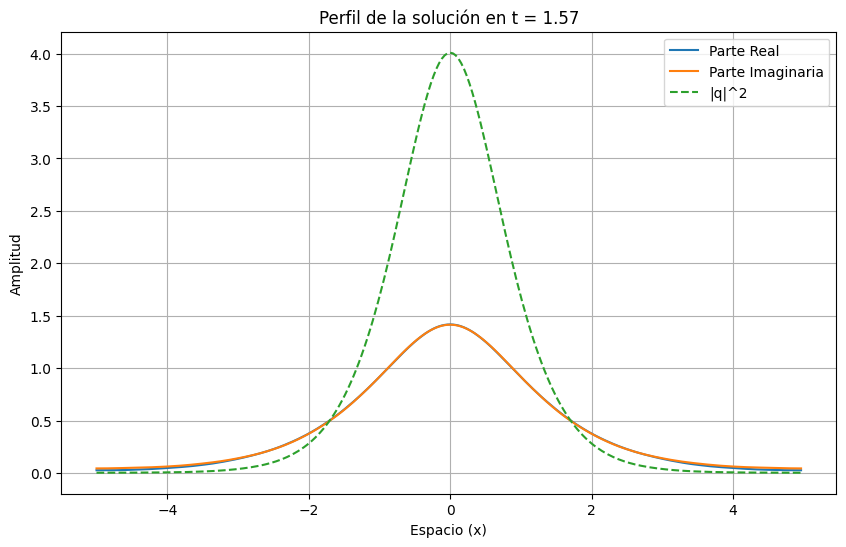

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np


data = scipy.io.loadmat('NLS.mat')


x = data['x'].flatten()
t = data['tt'].flatten()
q = data['uu']


T, X = np.meshgrid(t, x)

t
plt.figure(figsize=(10, 6))
plt.pcolormesh(T, X, np.abs(q)**2, shading='auto', cmap='viridis')
plt.colorbar(label='|q|^2')
plt.xlabel('Tiempo (t)')
plt.ylabel('Espacio (x)')
plt.title('Evolución de |q|^2 para N=2')
plt.show()

time_index = -1  # Último instante de tiempo
plt.figure(figsize=(10, 6))
plt.plot(x, np.real(q[:, time_index]), label='Parte Real')
plt.plot(x, np.imag(q[:, time_index]), label='Parte Imaginaria')
plt.plot(x, np.abs(q[:, time_index])**2, label='|q|^2', linestyle='--')
plt.xlabel('Espacio (x)')
plt.ylabel('Amplitud')
plt.title(f'Perfil de la solución en t = {t[time_index]:.2f}')
plt.legend()
plt.grid(True)
plt.show()




Generando soluciones exactas para NLSE...

GENERANDO SOLUCIÓN PARA N=1
Archivo 'NLS_N1.mat' creado exitosamente
N = 1
Dimensiones: x=256 puntos, t=100 puntos
Dominio: x ∈ [-5.0, 5.0], t ∈ [0.0, 1.5707963267948966]


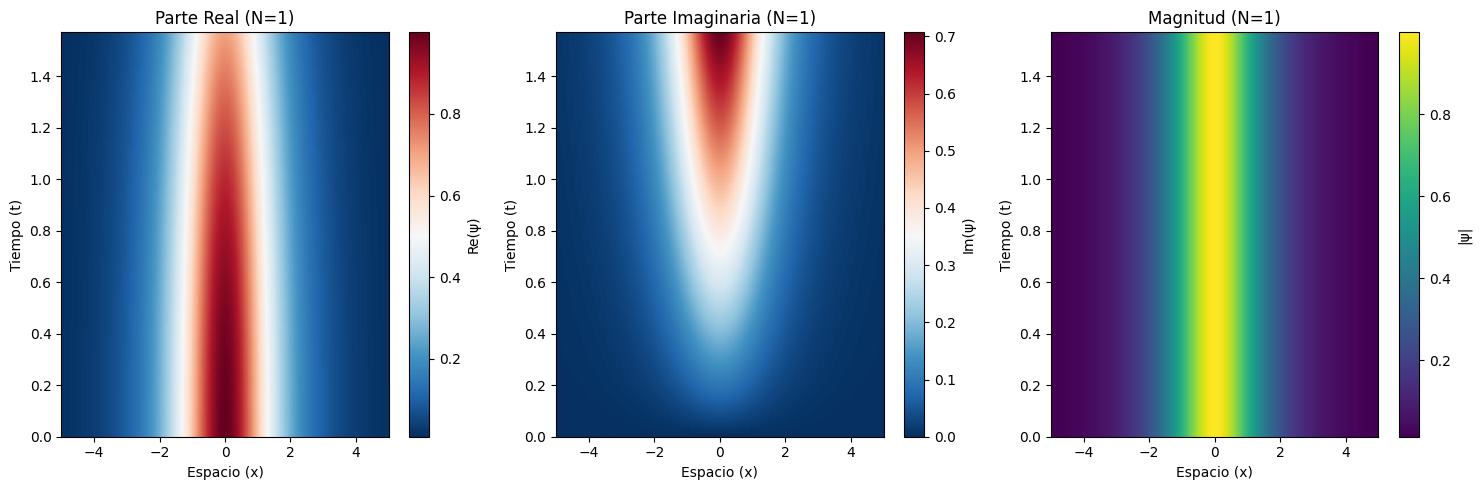


GENERANDO SOLUCIÓN PARA N=2
Archivo 'NLS_N2.mat' creado exitosamente
N = 2
Dimensiones: x=256 puntos, t=100 puntos
Dominio: x ∈ [-5.0, 5.0], t ∈ [0.0, 1.5707963267948966]


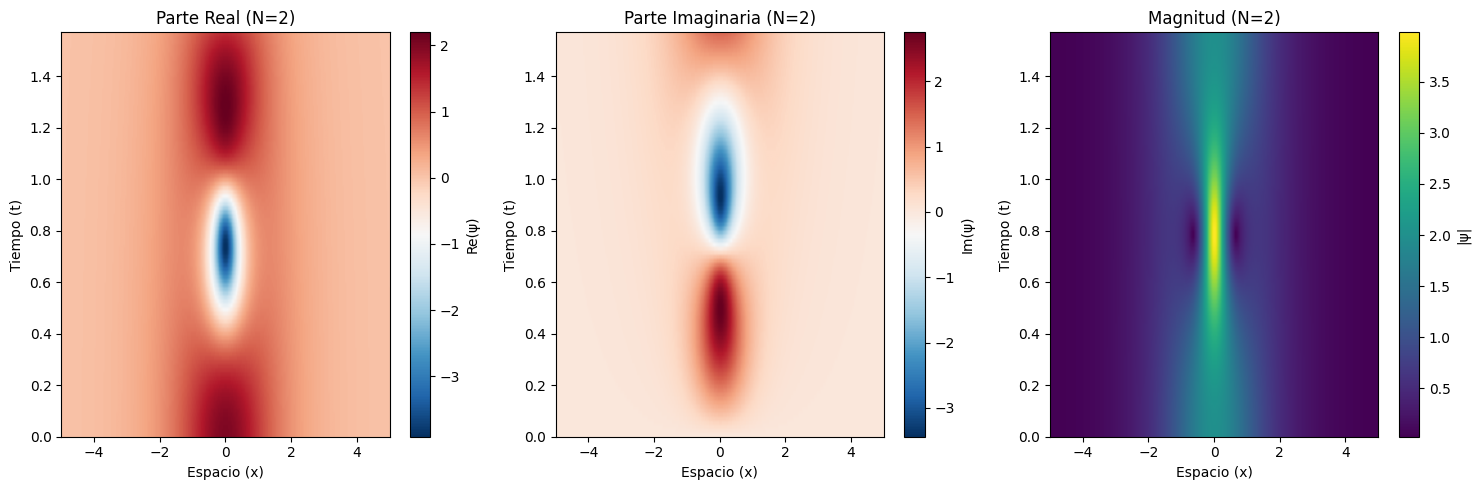


¡Ambas soluciones generadas exitosamente!
Archivos creados: 'NLS_N1.mat' y 'NLS_N2.mat'


In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

def nonlinear_schrodinger_solution(N=1):
    """
    Genera la solución exacta de la ecuación de Schrödinger no lineal
    para N=1 (solitón fundamental) o N=2 (dos solitones)
    en el dominio x ∈ [-5, 5], t ∈ [0, π/2]
    """
    
    x_min, x_max = -5.0, 5.0
    t_min, t_max = 0.0, np.pi/2
    
   
    Nx = 256  # Puntos en espacio
    Nt = 100  # Puntos en tiempo
    
    
    x_values = np.linspace(x_min, x_max, Nx)
    t_values = np.linspace(t_min, t_max, Nt)
    X, T = np.meshgrid(x_values, t_values)
    
    if N == 1:
        
        def exact_solution(x, t):
            """
            Solución exacta del solitón de la NLSE para N=1:
            ψ(x,t) = A * sech(A*(x - x0)) * exp(i*(A^2/2)*t)
            """
            A = 1.0    # Amplitud
            x0 = 0.0   # Centro del solitón
            
            sech_term = A / np.cosh(A * (x - x0))
            phase = 0.5 * A * A * t
            
            real_part = sech_term * np.cos(phase)
            imag_part = sech_term * np.sin(phase)
            
            return real_part + 1j*imag_part
        
        description = 'Solución NLSE N=1: ψ(x,t) = sech(x) * exp(i*t/2)'
        
    elif N == 2:
        
        def exact_solution(x, t):
            """
            Solución exacta para dos solitones de la NLSE
            ψ(x,t) = [4(cosh(3x) + 3e^(4it)cosh(x)) * e^(it/2)] / 
                     [cosh(4x) + 4cosh(2x) + 3cos(4t)]
            """
            numerator = 4 * (np.cosh(3*x) + 3 * np.exp(4j*t) * np.cosh(x)) * np.exp(0.5j*t)
            denominator = np.cosh(4*x) + 4 * np.cosh(2*x) + 3 * np.cos(4*t)
            
            return numerator / denominator
        
        description = 'Solución NLSE N=2: Dos solitones interactuando'
    
    else:
        raise ValueError("N debe ser 1 o 2")
    
    
    q_values = np.zeros((Nx, Nt), dtype=complex)
    
    for i, t in enumerate(t_values):
        for j, x in enumerate(x_values):
            q_values[j, i] = exact_solution(x, t)
    
    
    data = {
        'x_values': x_values.reshape(-1, 1),
        't_values': t_values.reshape(-1, 1),
        'q_values': q_values,
        'description': description,
        'N': N,
        'domain': {
            'x_min': x_min,
            'x_max': x_max,
            't_min': t_min,
            't_max': t_max
        }
    }
    
   
    filename = f'NLS_N{N}.mat'
    sio.savemat(filename, data)
    
    print(f"Archivo '{filename}' creado exitosamente")
    print(f"N = {N}")
    print(f"Dimensiones: x={Nx} puntos, t={Nt} puntos")
    print(f"Dominio: x ∈ [{x_min}, {x_max}], t ∈ [{t_min}, {t_max}]")
    
    
    plt.figure(figsize=(15, 5))
    
    
    plt.subplot(1, 3, 1)
    im1 = plt.imshow(np.real(q_values.T), extent=[x_min, x_max, t_min, t_max], 
                    aspect='auto', origin='lower', cmap='RdBu_r')
    plt.colorbar(im1, label='Re(ψ)')
    plt.xlabel('Espacio (x)')
    plt.ylabel('Tiempo (t)')
    plt.title(f'Parte Real (N={N})')
    
    
    plt.subplot(1, 3, 2)
    im2 = plt.imshow(np.imag(q_values.T), extent=[x_min, x_max, t_min, t_max], 
                    aspect='auto', origin='lower', cmap='RdBu_r')
    plt.colorbar(im2, label='Im(ψ)')
    plt.xlabel('Espacio (x)')
    plt.ylabel('Tiempo (t)')
    plt.title(f'Parte Imaginaria (N={N})')
    
    
    plt.subplot(1, 3, 3)
    im3 = plt.imshow(np.abs(q_values.T), extent=[x_min, x_max, t_min, t_max], 
                    aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(im3, label='|ψ|')
    plt.xlabel('Espacio (x)')
    plt.ylabel('Tiempo (t)')
    plt.title(f'Magnitud (N={N})')
    
    plt.tight_layout()
    plt.savefig(f'exact_solution_N{N}_verification.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return data


if __name__ == "__main__":
    print("Generando soluciones exactas para NLSE...")
    
   
    print("\n" + "="*50)
    print("GENERANDO SOLUCIÓN PARA N=1")
    print("="*50)
    data_n1 = nonlinear_schrodinger_solution(N=1)
    
    
    print("\n" + "="*50)
    print("GENERANDO SOLUCIÓN PARA N=2")
    print("="*50)
    data_n2 = nonlinear_schrodinger_solution(N=2)
    
    
    print("Archivos creados: 'NLS_N1.mat' y 'NLS_N2.mat'")

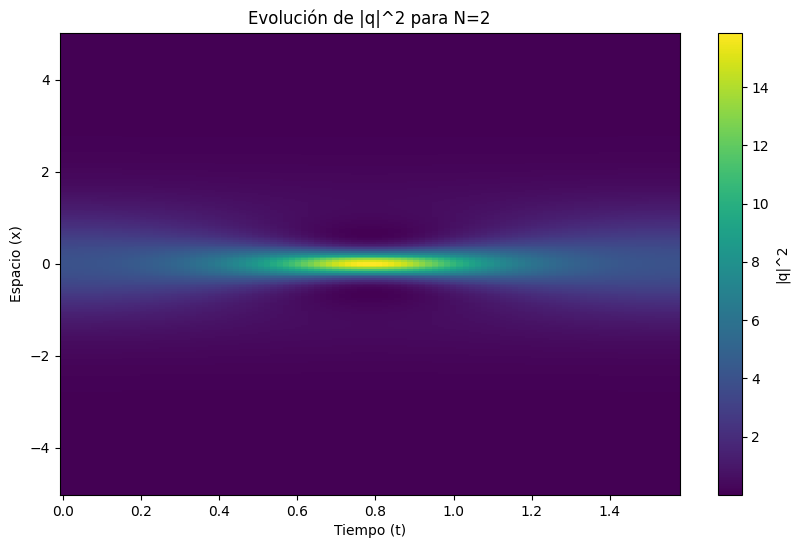

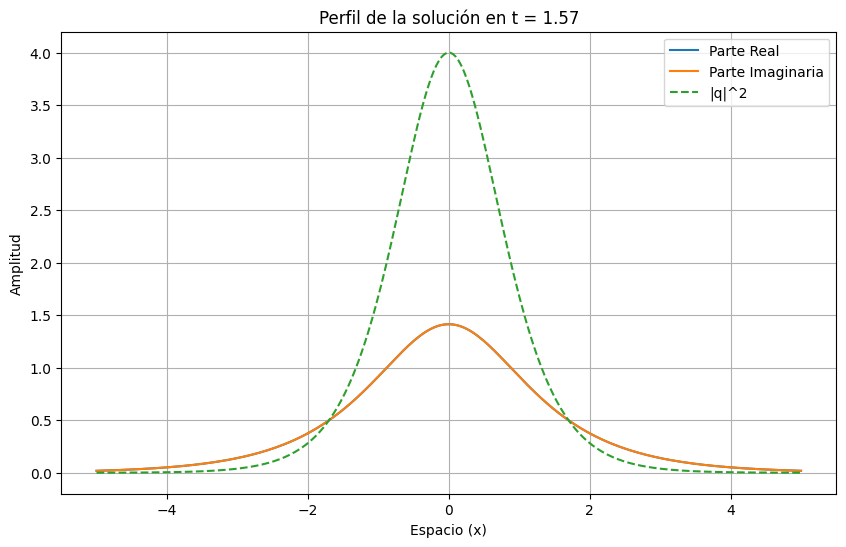

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np


data = scipy.io.loadmat('NLS_N2.mat')


x = data['x_values'].flatten()
t = data['t_values'].flatten()
q = data['q_values']


T, X = np.meshgrid(t, x)


plt.figure(figsize=(10, 6))
plt.pcolormesh(T, X, np.abs(q)**2, shading='auto', cmap='viridis')
plt.colorbar(label='|q|^2')
plt.xlabel('Tiempo (t)')
plt.ylabel('Espacio (x)')
plt.title('Evolución de |q|^2 para N=2')
plt.show()


time_index = -1  # Último instante de tiempo
plt.figure(figsize=(10, 6))
plt.plot(x, np.real(q[:, time_index]), label='Parte Real')
plt.plot(x, np.imag(q[:, time_index]), label='Parte Imaginaria')
plt.plot(x, np.abs(q[:, time_index])**2, label='|q|^2', linestyle='--')
plt.xlabel('Espacio (x)')
plt.ylabel('Amplitud')
plt.title(f'Perfil de la solución en t = {t[time_index]:.2f}')
plt.legend()
plt.grid(True)
plt.show()